<a href="https://colab.research.google.com/github/mukul-mschauhan/GenerativeAI/blob/main/Understanding_Transformers_%26_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

## Transformer Pipeline

In [ ]:
from transformers import pipeline
import pandas as pd

In [ ]:
# Define the Classifier as Text classification task

# Default Model Name: distilbert-base-uncased-finetuned-sst-2-english
classifier = pipeline("text-classification")

text = "I Hate watching action movies"

output = classifier(text)
pd.DataFrame(output)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


label     score
0  NEGATIVE  0.991934

In [ ]:
# Question answering Pipeline...

classifier = pipeline("question-answering")

# Define the question and context
question = "What is the capital of France?"
context = "The capital of France is Paris, a beautiful city."

# Input as a dictionary
output2 = classifier(question=question, context=context)

pd.DataFrame([output2])  # Enclose output2 in a list to create a DataFrame with one row

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


score  start  end answer
0  0.995531     25   30  Paris

In [ ]:
# Summarization Pipeline
summarizer = pipeline("summarization")

# Define the text to be summarized
text_to_summarize = """
The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris.
Its base is square, measuring 125 metres (410 ft) on each side.
During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York City was finished in 1930.
It was the first structure to reach a height of 300 meters.
Due to the addition of a broadcasting aerial at the top of the tower in 1957, it is now taller than the Chrysler Building by 5.2 meters (17 ft).
"""


# Input as a string
output3 = summarizer(text_to_summarize, max_length=130, min_length=30, do_sample=False)

pd.DataFrame(output3)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Device set to use cuda:0


summary_text
0   The tower is 324 metres (1,063 ft) tall, abou...

## Detect Sarcasm using t5-base-finetuned-sarcasm-twitter

https://huggingface.co/mrm8488/t5-base-finetuned-sarcasm-twitter

Google's T5 base fine-tuned on Twitter Sarcasm Dataset for Sequence classification (as text generation) downstream task.

In [ ]:
# Here we will use t5-base-finetuned-sarcasm-twitter

classifier = pipeline("text-classification",
                      model = 'mrm8488/t5-base-finetuned-sarcasm-twitter')

text = "I am thankful to Indigo. My Bag reached somewhere else and I reached somewhere else.What an amazing service"

output = classifier(text)
pd.DataFrame(output) # Will Return the Score of Being Sarcastic. Higher Score means more sarcasm

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-sarcasm-twitter and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Device set to use cuda:0


label    score
0  LABEL_1  0.63079

## Detect Emotions using Sam Lowe Roberta Model

In [ ]:
# Here we will use SamLowe/roberta-base-go_emotions - Disappointment

classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = '''Elon Musk Tesla Founder riding Tiago in Mumbai is a complicated situation.
However, he realised that his cars dont have CNG. hahahahha'''

output = classifier(text)
pd.DataFrame(output)

config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

Device set to use cuda:0


label     score
0  amusement  0.861039

In [ ]:
# Confusion
classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = "I am Lost, Hurt and Dont know if there is a light on the end of tunnel."

output = classifier(text)
pd.DataFrame(output)

Device set to use cuda:0


label     score
0  confusion  0.382137

In [ ]:
# Appreciation
classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = "Today, I got my dream job. Life is so beautiful."

output = classifier(text)
pd.DataFrame(output)

Device set to use cuda:0


label     score
0  admiration  0.690974

In [ ]:
# Gratitude
classifier = pipeline("text-classification", model = "SamLowe/roberta-base-go_emotions")

text = "God you have made my life amazing. I am thankful for this blessing"

output = classifier(text)
pd.DataFrame(output)

Device set to use cuda:0


label    score
0  gratitude  0.92507

## Text Generation

In [ ]:
# text Generation
text = "The product arrived damaged and the customer service was unhelpful. I am extremely disappointed and request a full refund."
print(text)


generator = pipeline("text-generation", model = "gpt2")
response = "I am sorry to hear that the Product Arrived Damaged"
prompt = "user: " + text + "Customer Service Response: " + response
print(prompt)

output = generator(prompt, max_length = 500, truncation = True)
print(output)

The product arrived damaged and the customer service was unhelpful. I am extremely disappointed and request a full refund.


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


user: The product arrived damaged and the customer service was unhelpful. I am extremely disappointed and request a full refund.Customer Service Response: I am sorry to hear that the Product Arrived Damaged
[{'generated_text': 'user: The product arrived damaged and the customer service was unhelpful. I am extremely disappointed and request a full refund.Customer Service Response: I am sorry to hear that the Product Arrived Damaged. As I stated in the phone, the package came to me with a broken and cracked glass. The back is now broken and they told me that it does not meet quality standards, and this is when I felt a bit betrayed. Customer Service Response: The company at Battersea Power did not explain that the product returned the product in a broken condition, nor that you have to return your device in this manner. Rather, I was taken to a Battersea Power representative and they stated, "We have not received any reports of broken product reports since this product was delivered." Th

In [ ]:
output

[{'generated_text': 'user: The product arrived damaged and the customer service was unhelpful. I am extremely disappointed and request a full refund.Customer Service Response: I am sorry to hear that the Product Arrived Damaged. As I stated in the phone, the package came to me with a broken and cracked glass. The back is now broken and they told me that it does not meet quality standards, and this is when I felt a bit betrayed. Customer Service Response: The company at Battersea Power did not explain that the product returned the product in a broken condition, nor that you have to return your device in this manner. Rather, I was taken to a Battersea Power representative and they stated, "We have not received any reports of broken product reports since this product was delivered." The representative said that customer service would be the first and they would ask that you return this product for testing. They asked if you would like a refund for anything that might have occurred to you,

In [ ]:
# Complete the story....
text = "Once upon a time, there lived Hansel and Gretel"
print(text)

generator = pipeline("text-generation", model = "gpt2")

output = generator(text, max_length = 1000, truncation = True)
print(output)

Once upon a time, there lived Hansel and Gretel


Device set to use cuda:0
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Once upon a time, there lived Hansel and Gretel. It was during their stay in the Great Hall of the Great Hall of the Olde England, that the two were taken into the house of his grandfather, William of Llanas, to be kept at bay. The house was quite small, made out of very narrow, barred windows and made into a room with an entrance only for the maid who entered with the exception of one half-sister, Mary. The mother of the two, Margaret was a woman of very modest character, and with a very fair complexion. The grandmother was a wife of the great gentleman, Sir John.\n\nWilliam remained in the house of the Lord Henry, and stayed for a time without any notice, and returned again with his father in 2043, leaving his wife Mary behind and their new child at Llanas. They continued to visit the house of William, but he returned in 2045 and was sent back again to Scotland, while they were in the service of King Alexander\'s council as well as with his wife Mary. His health 

In [ ]:
output

[{'generated_text': 'Once upon a time, there lived Hansel and Gretel. It was during their stay in the Great Hall of the Great Hall of the Olde England, that the two were taken into the house of his grandfather, William of Llanas, to be kept at bay. The house was quite small, made out of very narrow, barred windows and made into a room with an entrance only for the maid who entered with the exception of one half-sister, Mary. The mother of the two, Margaret was a woman of very modest character, and with a very fair complexion. The grandmother was a wife of the great gentleman, Sir John.\n\nWilliam remained in the house of the Lord Henry, and stayed for a time without any notice, and returned again with his father in 2043, leaving his wife Mary behind and their new child at Llanas. They continued to visit the house of William, but he returned in 2045 and was sent back again to Scotland, while they were in the service of King Alexander\'s council as well as with his wife Mary. His health 

## Image Classification

In [ ]:
from PIL import Image
import requests

In [ ]:
img = "https://images.squarespace-cdn.com/content/v1/607f89e638219e13eee71b1e/1684821560422-SD5V37BAG28BURTLIXUQ/michael-sum-LEpfefQf4rU-unsplash.jpg"

# convert the image into array
image =Image.open(requests.get(img, stream=True).raw)
print(image)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2500x1667 at 0x79A1E0CEAA90>


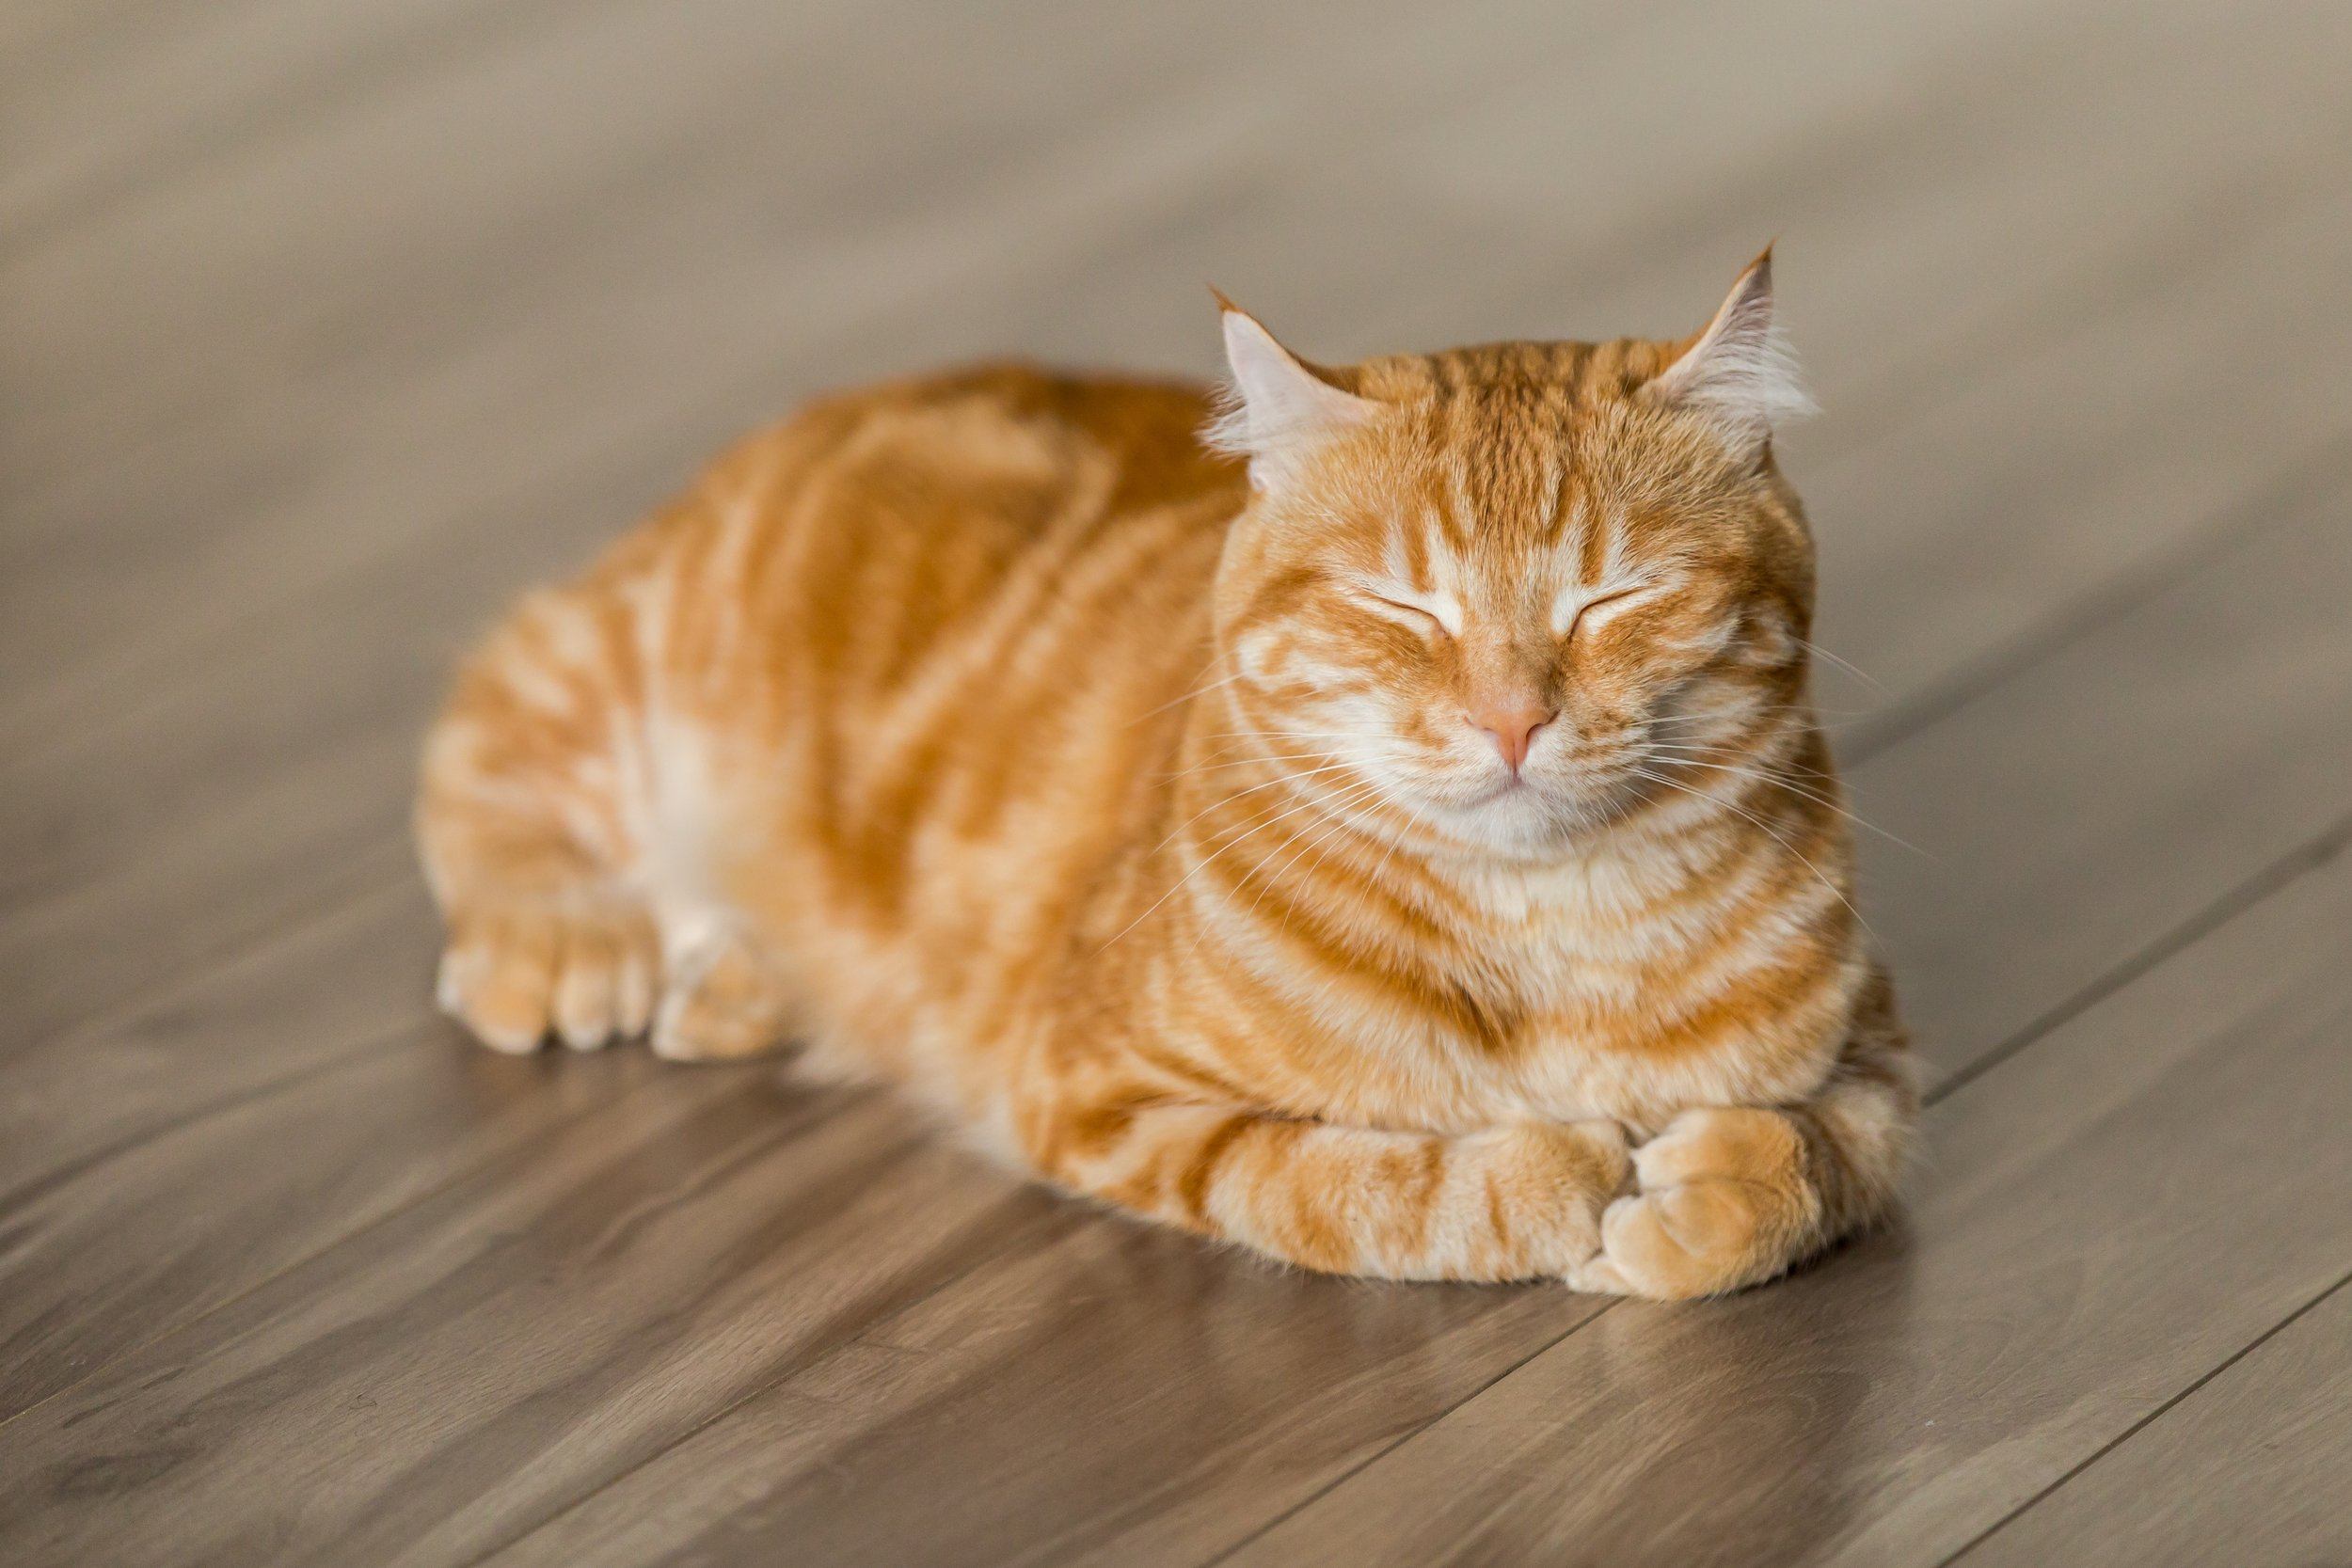

In [ ]:
image

In [ ]:
import numpy as np
np.array(image)

array([[[159, 145, 119],
        [159, 145, 119],
        [160, 146, 120],
        ...,
        [169, 156, 139],
        [169, 156, 139],
        [169, 156, 139]],

       [[159, 145, 119],
        [159, 145, 119],
        [160, 146, 120],
        ...,
        [169, 156, 139],
        [169, 156, 139],
        [168, 155, 138]],

       [[159, 145, 119],
        [160, 146, 120],
        [160, 146, 120],
        ...,
        [169, 156, 139],
        [168, 155, 138],
        [168, 155, 138]],

       ...,

       [[104,  91,  75],
        [105,  92,  76],
        [106,  93,  77],
        ...,
        [111,  98,  82],
        [113,  97,  82],
        [113, 100,  84]],

       [[104,  91,  75],
        [105,  92,  76],
        [106,  93,  77],
        ...,
        [110,  97,  81],
        [110,  97,  81],
        [112,  99,  83]],

       [[104,  91,  75],
        [105,  92,  76],
        [106,  93,  77],
        ...,
        [108,  95,  79],
        [108,  95,  79],
        [112,  99,  83]]

In [ ]:
classifier = pipeline("image-classification")
output = classifier(image)
pd.DataFrame(output)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


label     score
0             tiger cat  0.578943
1      tabby, tabby cat  0.223310
2          Egyptian cat  0.148426
3           Persian cat  0.005814
4  lens cap, lens cover  0.001550

## Detect Emotions

In [ ]:
# dima806/facial_emotions_image_detection

img = "https://images.pexels.com/photos/2379004/pexels-photo-2379004.jpeg?cs=srgb&dl=pexels-italo-melo-881954-2379004.jpg&fm=jpg"

# convert the image into array
image =Image.open(requests.get(img, stream=True).raw)

classifier = pipeline("image-classification",
                      model = "dima806/facial_emotions_image_detection")
output = classifier(image)
pd.DataFrame(output)

config.json:   0%|          | 0.00/907 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


label     score
0     happy  0.807336
1   neutral  0.056809
2     angry  0.051447
3  surprise  0.030952
4   disgust  0.018990

## Find the Age of the Person in the Image

In [ ]:
# Find the Age: nateraw/vit-age-classifier

img = "https://thumbs.dreamstime.com/b/old-man-20313005.jpg"

# convert the image into array
image =Image.open(requests.get(img, stream=True).raw)


classifier = pipeline("image-classification", model = "nateraw/vit-age-classifier")
output = classifier(image)
pd.DataFrame(output)

config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/197 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


label     score
0  more than 70  0.750044
1         60-69  0.231534
2         50-59  0.009286
3           3-9  0.004285
4         10-19  0.002233

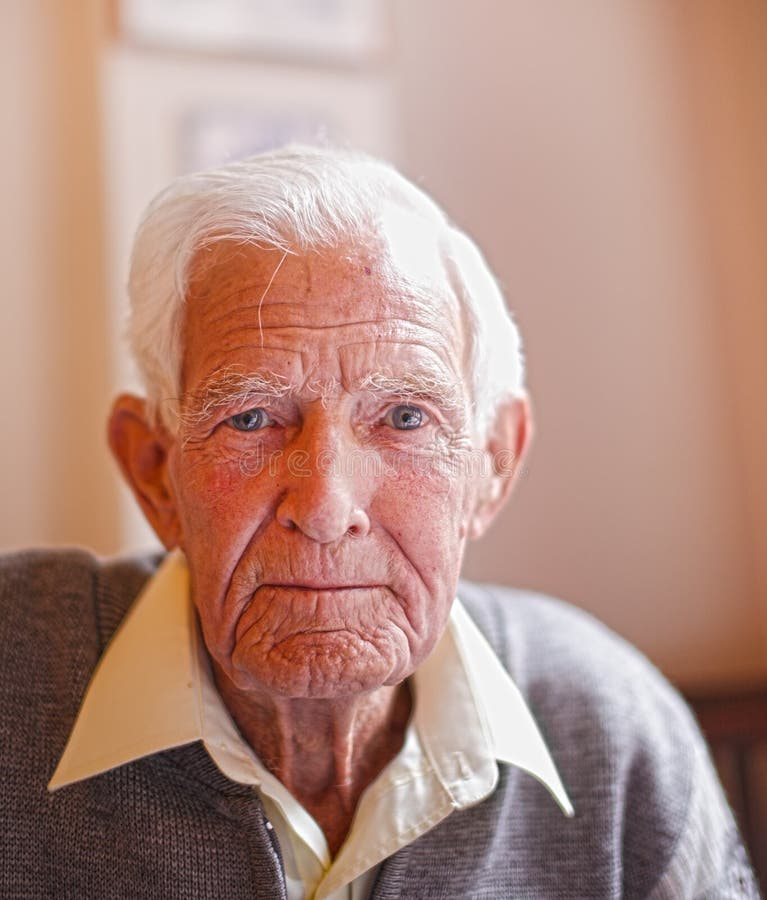

In [ ]:
image